***
### Test Example
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
url = 'data_file.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15814 entries, 0 to 15813
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             15814 non-null  int64  
 1   month            15814 non-null  int64  
 2   warning          12775 non-null  object 
 3   visibility       15814 non-null  object 
 4   height           15681 non-null  float64
 5   speed            15814 non-null  int64  
 6   species name     15813 non-null  object 
 7   injuries         127 non-null    float64
 8   aircraft damage  15814 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [3]:
data

,year,month,warning,visibility,height,speed,species name,injuries,aircraft damage
0,1990,1,NaN,DAY,100.0,200,FINCH,NaN,0
1,1990,2,NaN,DAY,50.0,110,UNKNOWN MEDIUM BIRD,NaN,0
2,1990,2,NaN,DAY,800.0,140,UNKNOWN MEDIUM BIRD,NaN,0
3,1990,2,No,NIGHT,10000.0,250,HAWK,NaN,1
4,1990,3,NaN,NIGHT,1700.0,170,UNKNOWN MEDIUM BIRD,NaN,0
...,...,...,...,...,...,...,...,...,...
15809,2015,9,No,NIGHT,1200.0,155,UNKNOWN SMALL BIRD,NaN,0
15810,2015,9,Yes,NIGHT,5500.0,250,INDIGO BUNTING,NaN,0
15811,2015,9,NaN,NIGHT,1000.0,125,UNKNOWN MEDIUM BIRD,NaN,0
15812,2015,9,No,DAY,1300.0,120,HAWK,NaN,0


***
# Q1
***

In [4]:
filterd= data.loc[(data['aircraft damage'] == 1) | (data['injuries'] == 1)]
df= filterd.groupby(['species name'])[['aircraft damage', 'injuries']].sum()
df.sort_values('aircraft damage', ascending= False).head(3).reset_index()


,species name,aircraft damage,injuries
0,UNKNOWN MEDIUM BIRD,203,16.0
1,GULL,112,9.0
2,UNKNOWN SMALL BIRD,105,3.0


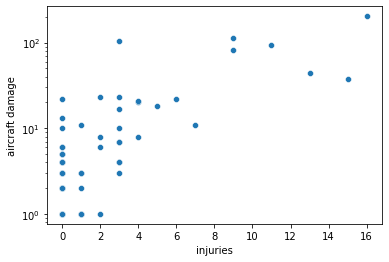

In [5]:
ax = sns.scatterplot(data = df, y="aircraft damage", x="injuries")
ax.set_yscale("log")

***
# Q2
***

In [6]:
data['warning'].fillna('unknown', inplace= True)

In [9]:
comparison= data.loc[(data['species name'] == 'DUCK') | (data['species name'] == 'GULL')]
comparison

,year,month,warning,visibility,height,speed,species name,injuries,aircraft damage
8,1990,4,No,DAY,0.0,150,GULL,NaN,0
15,1990,5,No,NIGHT,400.0,180,GULL,NaN,0
16,1990,5,No,DAY,3200.0,160,DUCK,NaN,1
18,1990,5,unknown,DAY,0.0,120,GULL,NaN,0
19,1990,5,No,DAY,10.0,100,GULL,NaN,0
...,...,...,...,...,...,...,...,...,...
15529,2015,8,No,DAY,570.0,70,GULL,NaN,0
15549,2015,8,No,DAY,800.0,125,GULL,NaN,1
15681,2015,9,No,DAY,0.0,151,GULL,NaN,0
15780,2015,9,No,NIGHT,20.0,130,GULL,NaN,0


<AxesSubplot:xlabel='species name', ylabel='injuries'>

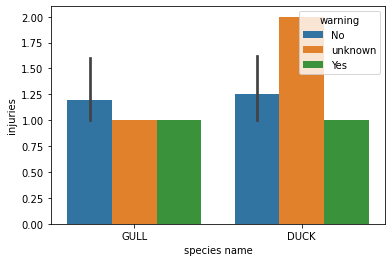

In [10]:
sns.barplot(data = comparison, 
            hue = 'warning', y = "injuries", x = "species name")

***
# Q3
***

<AxesSubplot:xlabel='visibility', ylabel='speed'>

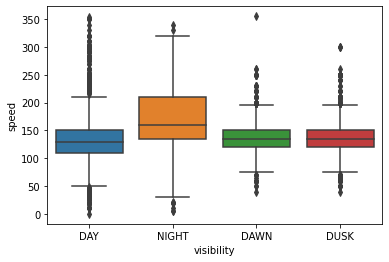

In [13]:
##plt.figure(figsize=(10,5))
sns.boxplot(data = data, y = "speed", x = "visibility")

***
# Q4
***

In [14]:
features= ['height', 'speed', 'month', 'aircraft damage']

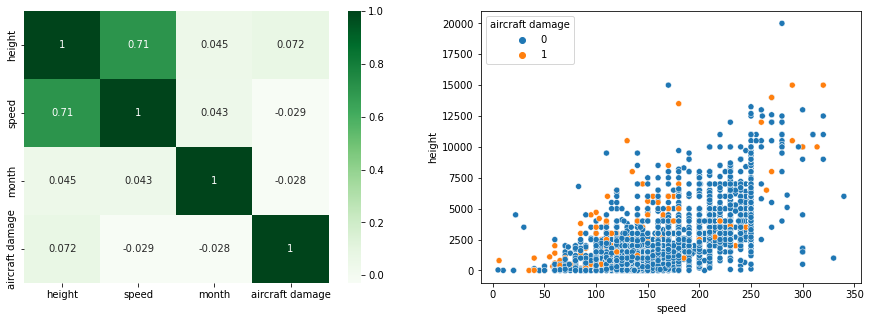

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax = sns.heatmap(data[features].corr(),annot=True,cmap='Greens', ax = axes[0])
ax = sns.scatterplot(data = data.loc[data["visibility"] == "NIGHT"], y = "height", x = "speed", hue = "aircraft damage", ax = axes[1])